<a href="https://colab.research.google.com/github/Amelia-330/Machine-Learning/blob/main/week5_homework_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#定义编码尺寸
encoding_dim = 64

In [ ]:
#读取输入图像定义输入
input_img =Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)


decoded = Dense(784,activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img,encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
#编译模型,以便可以运行自动编码器
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

## Load mnist dataset

In [ ]:
#从mnist数据集和书面数据集中读取数据
(x_train,_),(x_test,_) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train),(np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test),(np.prod(x_test.shape[1:]))))

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


## Fit data

In [ ]:
#把数据拟合到自动编码器模型中
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2815 - val_loss: 0.2804
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2814 - val_loss: 0.2804
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2814 - val_loss: 0.2803
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2813 - val_loss: 0.2803
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2813 - val_loss: 0.2802
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2812 - val_loss: 0.2802
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2812 - val_loss: 0.2801
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2812 - val_loss: 0.2801
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2811 - val_loss: 0.2801
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2811 - val_loss: 0.2800

In [ ]:
#对模型进行预测
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
#此解码图像将包含重新生成的图像

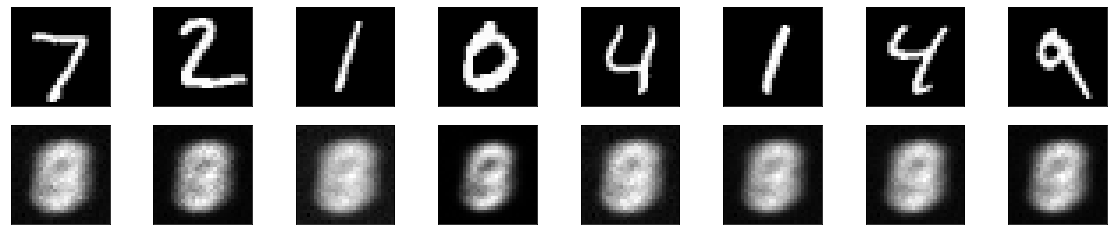

In [ ]:
#编写绘图代码，以便显示多少位数
n = 8
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()